In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pylab
%matplotlib inline

from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import keras
from keras.models import Sequential
from keras.layers import Dense
#from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [2]:
heart_df = pd.read_csv("../input/heart-disease-uci/heart.csv")
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


> 1. age 
> 2. sex 
> 3. chest pain type (4 values) 
> 4. resting blood pressure 
> 5. serum cholestoral in mg/dl 
> 6. fasting blood sugar > 120 mg/dl
> 7. resting electrocardiographic results (values 0,1,2)
> 8. maximum heart rate achieved 
> 9. exercise induced angina 
> 10. oldpeak = ST depression induced by exercise relative to rest 
> 11. the slope of the peak exercise ST segment 
> 12. number of major vessels (0-3) colored by flourosopy 
> 13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

In [3]:
# Sex Dictionary
sex_dict = { 0: 'Female',1: 'Male' }

# Chest Pain Dictionary
chest_pain_dict = { 0:'Typical Angina', 1:'Atypical Angina', 2:'Non-Anginal Pain', 3:'Asymptomatic'}

# Blood Sugar  Dictionary
fbs_dict = { 0: 'No Blood Sugar', 1: 'Blood Sugar'}

# Rest ECG
restecg_dict = { 0:'Normal restecg', 1:'ST-T wave abnormality restecg', 2:'ventricular hypertrophy restecg'}

# Exercise Induced Angina
exang_dict = { 0:'Exang No', 1:'Exang Yes'}

# Slope of the peak exercise ST segment 
slope_dict = { 0:'Upsloping', 1:'flat', 2:'Downsloping'}

# Number of Major Vessels (0-3) Colored by Flourosopy
ca_dict = { 0:'Major vessel 0', 1:'Major vessel 1', 2:'Major vessel 2', 3:'Major vessel 3', 4:'Major vessel 4'}

# Thalassemia Dictionary
thal_dict = { 0: 'None', 1: 'Normal', 2:'Fixed Defect',3:'Reversable Defect'}

# Target Dictionary
target_dict = { 0: 'Not Present', 1: 'Present'}

#### Creating new DataFrame

In [4]:
df = heart_df[['age']]

# trestbps as Resting Blood Pressure
df['Resting Blood Pressure'] = heart_df['trestbps']

# chol as Serum Cholestoral
df['Serum Cholestoral'] = heart_df['chol']

# thalach as Max. Heart Rate
df['Max. Heart Rate'] = heart_df['thalach']

# old peak ST Depression
df['ST Depression'] = heart_df['oldpeak']

# sex as Sex
df['Sex'] = heart_df['sex'].apply(lambda x:sex_dict[x])

# thal as Thalassemia
df['Thalassemia'] = heart_df['thal'].apply(lambda x:thal_dict[x])

# fbs as Thalassemia
df['Fasting Blood Sugar'] = heart_df['fbs'].apply(lambda x:fbs_dict[x])

# cp as Chest Pain
df['Chest Pain'] = heart_df['cp'].apply(lambda x:chest_pain_dict[x])

# target as Heart Disease
df['Heart Disease'] = heart_df['target'].apply(lambda x:target_dict[x])

In [5]:
df.head()

,age,Resting Blood Pressure,Serum Cholestoral,Max. Heart Rate,ST Depression,Sex,Thalassemia,Fasting Blood Sugar,Chest Pain,Heart Disease
0,63,145,233,150,2.3,Male,Normal,Blood Sugar,Asymptomatic,Present
1,37,130,250,187,3.5,Male,Fixed Defect,No Blood Sugar,Non-Anginal Pain,Present
2,41,130,204,172,1.4,Female,Fixed Defect,No Blood Sugar,Atypical Angina,Present
3,56,120,236,178,0.8,Male,Fixed Defect,No Blood Sugar,Atypical Angina,Present
4,57,120,354,163,0.6,Female,Fixed Defect,No Blood Sugar,Typical Angina,Present


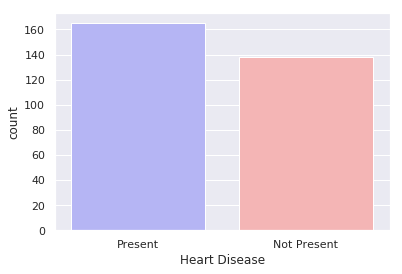

In [6]:
sns.set(style = "darkgrid")
sns.countplot(x = "Heart Disease", data = df, palette = "bwr")

In [7]:
countNoDisease = len(df[df['Heart Disease'] == 'Not Present'])
countHaveDisease = len(df[df['Heart Disease'] == 'Present'])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(df['Heart Disease'])) * 100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df['Heart Disease'])) * 100)))

Percentage of Patients Haven't Heart Disease: 45.54%
Percentage of Patients Have Heart Disease: 54.46%


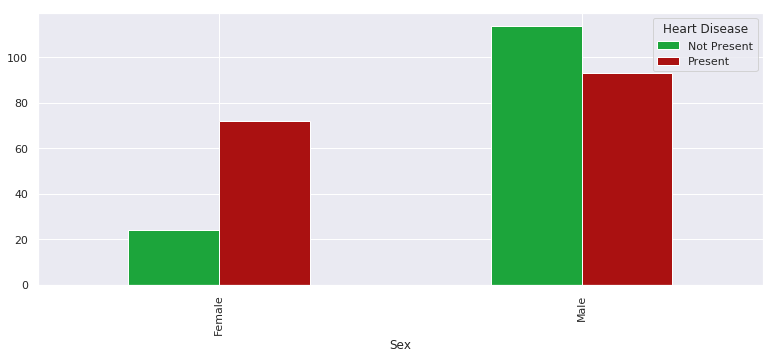

In [8]:
pd.crosstab(df['Sex'], df['Heart Disease']).plot(kind = 'bar', figsize = (13,5), color = ['#1CA53B','#AA1111' ])

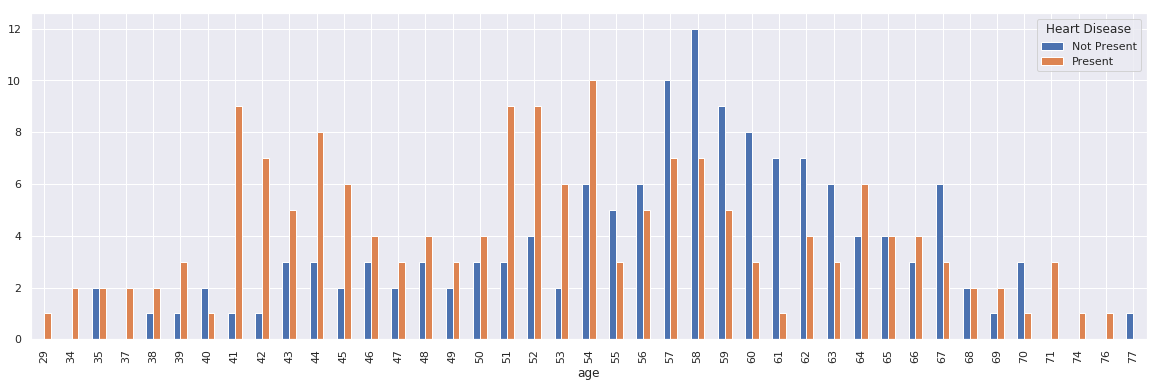

In [9]:
pd.crosstab(df['age'], df['Heart Disease']).plot(kind = "bar", figsize = (20,6))

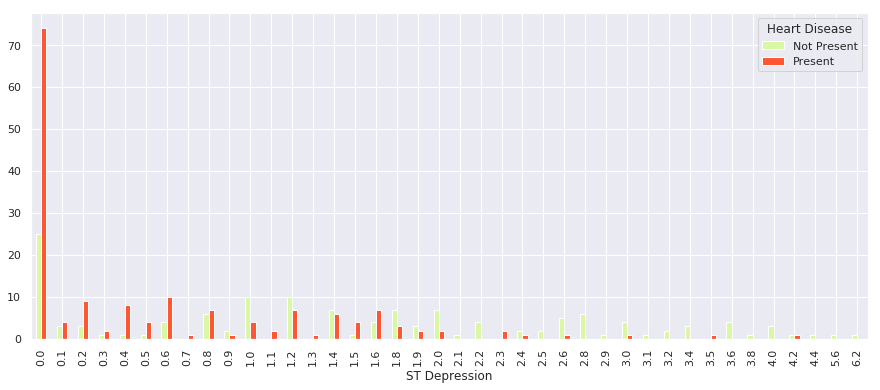

In [10]:
pd.crosstab(df['ST Depression'], df['Heart Disease']).plot(kind = "bar", figsize = (15,6), color = ['#DAF7A6','#FF5733' ])

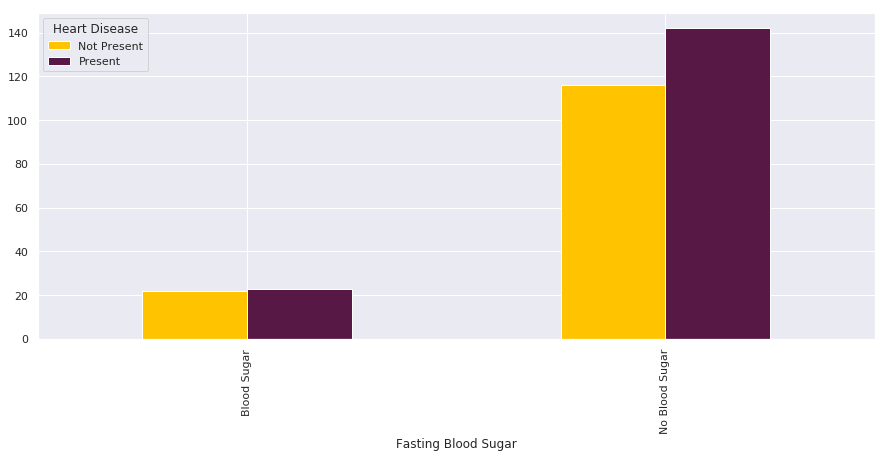

In [11]:
pd.crosstab(df['Fasting Blood Sugar'], df['Heart Disease']).plot(kind = "bar", figsize = (15,6), color = ['#FFC300','#581845' ])

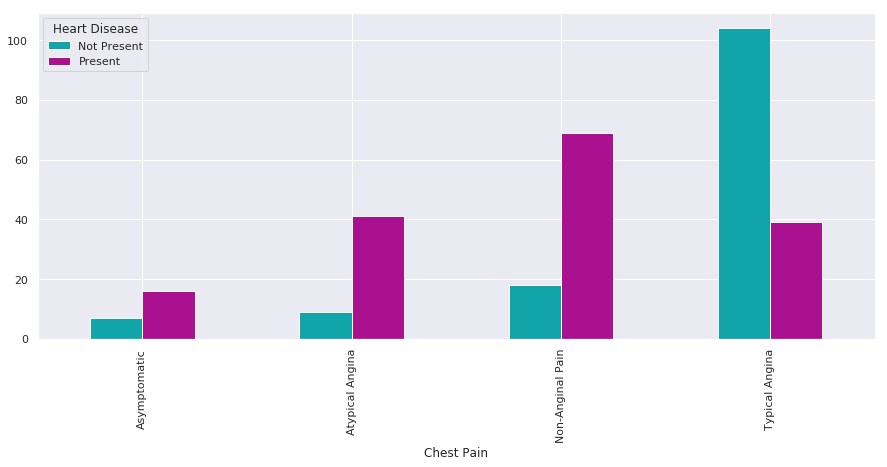

In [12]:
pd.crosstab(df['Chest Pain'], df['Heart Disease']).plot(kind = "bar", figsize = (15,6), color = ['#11A5AA','#AA1190' ])

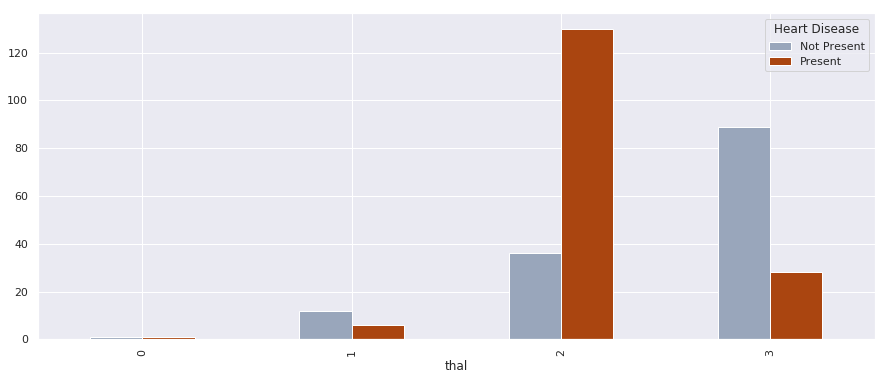

In [13]:
pd.crosstab(heart_df.thal, df['Heart Disease']).plot(kind = "bar", figsize = (15,6), color = ['#99A6BB','#AA4510' ])

#### We plot the heatmap by using the correlation for the dataset. This helps us eliminate any features that may not help with prediction.

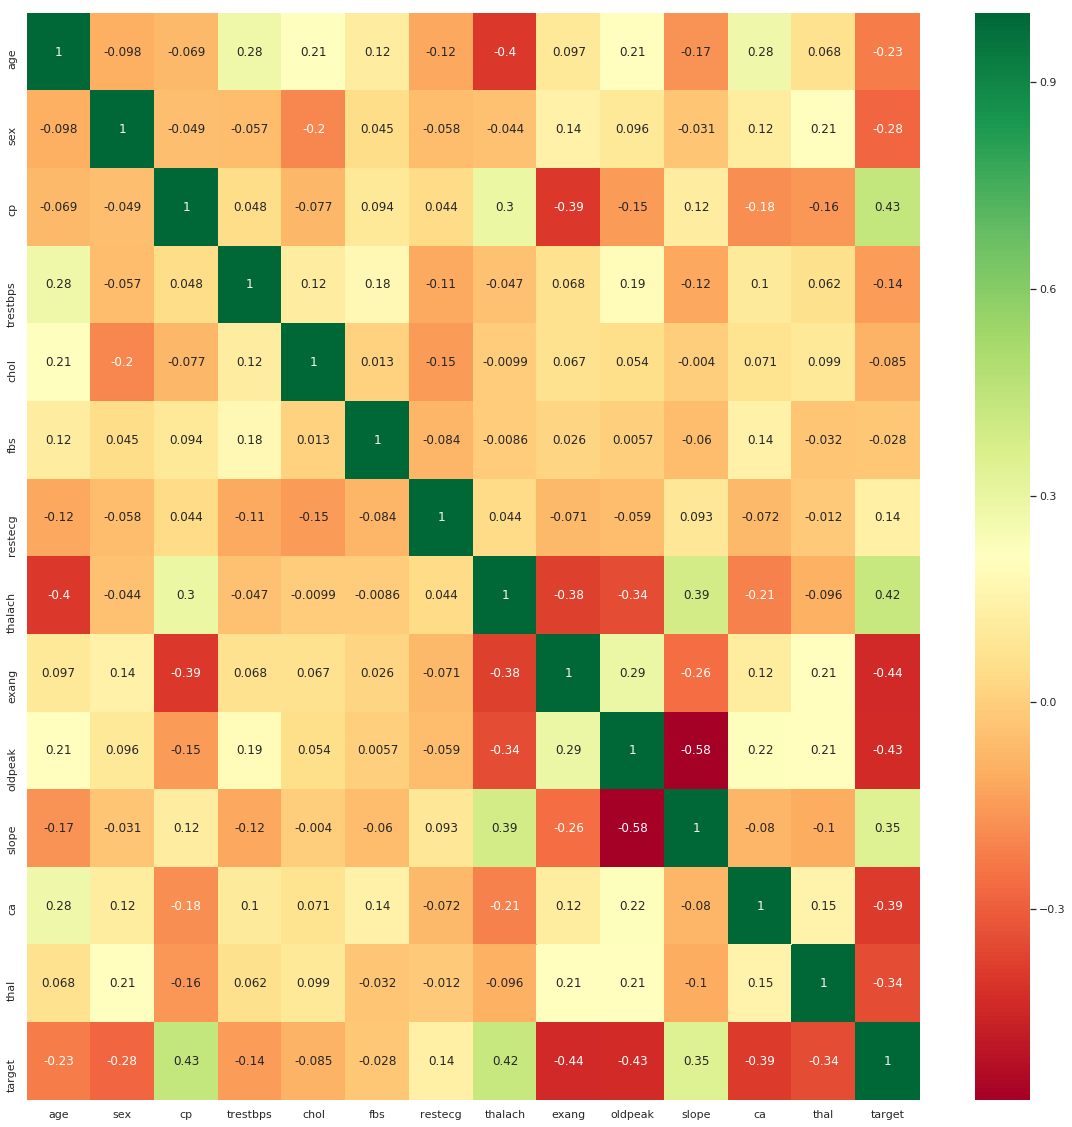

In [14]:
#get correlations of each features in dataset
corrmat = heart_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (20,20))

#plot heat map
sns.heatmap(heart_df[top_corr_features].corr(), annot = True, cmap = "RdYlGn")

In [15]:
#Correlation with output variable
cor_target = abs(corrmat["target"])

#Selecting highly correlated features
relevant_features = cor_target[cor_target > 0.10]
relevant_features

age         0.225439
sex         0.280937
cp          0.433798
trestbps    0.144931
restecg     0.137230
thalach     0.421741
exang       0.436757
oldpeak     0.430696
slope       0.345877
ca          0.391724
thal        0.344029
target      1.000000
Name: target, dtype: float64

In [16]:
X = heart_df.drop(['fbs','chol','target'], 1)
Y = heart_df['target']

In [17]:
#standardizing the input feature

sc = StandardScaler()
X = sc.fit_transform(X)

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

## Supervised Algorithms

In [19]:
scores = []
models_name = []

### Stocastich Gradient Descent

In [20]:
sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
sgd.fit(X_train, Y_train)
y_pred_sgd = sgd.predict(X_test)
score_sgd = round(accuracy_score(y_pred_sgd,Y_test) * 100, 2)

print("The accuracy score achieved using Stochastic Gradient Discent is: " + str(score_sgd) + " %")

scores.append(score_sgd)
models_name.append('SGD')

The accuracy score achieved using Stochastic Gradient Discent is: 76.32 %


### Logistic Regression

In [21]:
lr = LogisticRegression()
lr.fit(X_train,Y_train)
y_pred_lr = lr.predict(X_test)
score_lr = round(accuracy_score(y_pred_lr,Y_test) * 100, 2)

print("The accuracy score achieved using Logistic Regression is: " + str(score_lr) + " %")

scores.append(score_lr)
models_name.append('LGR')

The accuracy score achieved using Logistic Regression is: 82.89 %


### K-Nearest Neighbor

In [22]:
k_range = range(1,10)
scores_list = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,Y_train)
    y_pred_knn = knn.predict(X_test)
    score_knn = round(accuracy_score(y_pred_knn,Y_test) * 100, 2)
    scores_list.append(score_knn)

print("The accuracy score achieved using KNN is: " + str(max(scores_list)) + " %")

scores.append(max(scores_list))
models_name.append('KNN')

The accuracy score achieved using KNN is: 85.53 %


### Gaussian Naive Bayes - Probabilistic Classifier

In [23]:
nb = GaussianNB()
nb.fit(X_train,Y_train)
y_pred_nb = nb.predict(X_test)
score_nb = round(accuracy_score(y_pred_nb,Y_test) * 100, 2)

print("The accuracy score achieved using Naive Bayes is: " + str(score_nb) + " %")

scores.append(score_nb)
models_name.append('GNB')

The accuracy score achieved using Naive Bayes is: 81.58 %


### Decision Tree - Probabilistic Classifier

In [24]:
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)
y_pred_dt = dt.predict(X_test)
score_dt = round(accuracy_score(y_pred_dt, Y_test) * 100, 2)

print("The accuracy score achieved using Decision Tree is: " + str(score_dt) + " %")

scores.append(score_dt)
models_name.append('DT')

The accuracy score achieved using Decision Tree is: 80.26 %


### Support Vector Machine

In [25]:
sv = SVC(kernel = 'sigmoid')
sv.fit(X_train, Y_train)
y_pred_svm = sv.predict(X_test)
score_svm = round(accuracy_score(y_pred_svm, Y_test) * 100, 2)

print("The accuracy score achieved using Linear SVM is: " + str(score_svm) + " %")

scores.append(score_svm)
models_name.append('SVM')

The accuracy score achieved using Linear SVM is: 84.21 %


### Random Forest

In [26]:
rf = RandomForestClassifier(n_estimators = 100, bootstrap = True)
rf.fit(X_train, Y_train)
y_pred_rf = rf.predict(X_test)
score_rf = round(accuracy_score(y_pred_rf, Y_test) * 100, 2)

print("The accuracy score achieved using Random Forest is: " + str(score_rf) + " %")

scores.append(score_rf)
models_name.append('RF')

The accuracy score achieved using Random Forest is: 81.58 %


## Neural Network

In [27]:
classifier = Sequential()
# First Hidden Layer
classifier.add(Dense(4, activation = 'relu', kernel_initializer = 'random_normal', input_dim = 11))
# Second  Hidden Layer
classifier.add(Dense(4, activation = 'relu', kernel_initializer = 'random_normal'))
# Output Layer
classifier.add(Dense(1, activation = 'sigmoid', kernel_initializer = 'random_normal'))

In [28]:
# Compiling the neural network
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [29]:
# Fitting the data to the training dataset
history = classifier.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs = 100, batch_size = 16, verbose = 2)

Train on 227 samples, validate on 76 samples
Epoch 1/100
 - 1s - loss: 0.6932 - acc: 0.5374 - val_loss: 0.6929 - val_acc: 0.6184
Epoch 2/100
 - 0s - loss: 0.6928 - acc: 0.5419 - val_loss: 0.6923 - val_acc: 0.5658
Epoch 3/100
 - 0s - loss: 0.6921 - acc: 0.5551 - val_loss: 0.6913 - val_acc: 0.5921
Epoch 4/100
 - 0s - loss: 0.6908 - acc: 0.6432 - val_loss: 0.6896 - val_acc: 0.7632
Epoch 5/100
 - 0s - loss: 0.6884 - acc: 0.7930 - val_loss: 0.6865 - val_acc: 0.8026
Epoch 6/100
 - 0s - loss: 0.6841 - acc: 0.8458 - val_loss: 0.6816 - val_acc: 0.8816
Epoch 7/100
 - 0s - loss: 0.6774 - acc: 0.8546 - val_loss: 0.6745 - val_acc: 0.8553
Epoch 8/100
 - 0s - loss: 0.6676 - acc: 0.8414 - val_loss: 0.6648 - val_acc: 0.8553
Epoch 9/100
 - 0s - loss: 0.6562 - acc: 0.8282 - val_loss: 0.6524 - val_acc: 0.8421
Epoch 10/100
 - 0s - loss: 0.6408 - acc: 0.8326 - val_loss: 0.6383 - val_acc: 0.8553
Epoch 11/100
 - 0s - loss: 0.6238 - acc: 0.8238 - val_loss: 0.6224 - val_acc: 0.8553
Epoch 12/100
 - 0s - loss: 0.

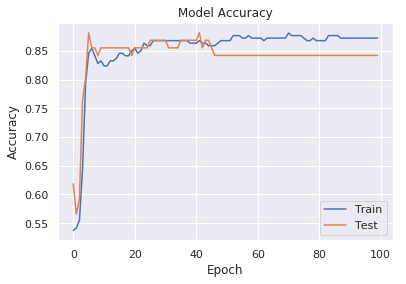

In [30]:
# Model accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

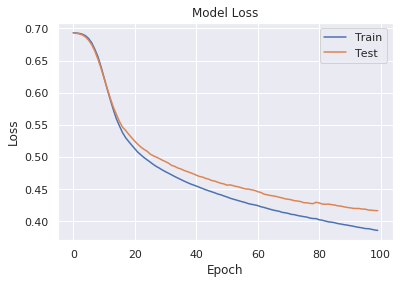

In [31]:
# Model Losss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

In [32]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

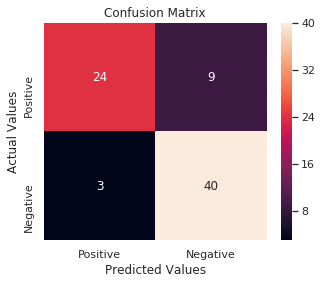

In [33]:
# Confusion Matrix
cm = confusion_matrix(Y_test, y_pred)
plt.figure(figsize = (5,4))
sns.heatmap(cm, xticklabels = ['Positive','Negative'], yticklabels = ['Positive','Negative'], annot = True, fmt = 'd')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [34]:
true_pos = np.diag(cm)
false_pos = np.sum(cm, axis = 0) - true_pos
false_neg = np.sum(cm, axis = 1) - true_pos
score_nn = round(np.sum(true_pos)/(np.sum(true_pos) + np.sum(false_pos)) * 100, 2)

print("The accuracy score achieved using Neural Network is: " + str(score_nn) + " %")

scores.append(score_nn)
models_name.append('NN')

The accuracy score achieved using Neural Network is: 84.21 %


[76.32, 82.89, 85.53, 81.58, 80.26, 84.21, 81.58, 84.21]


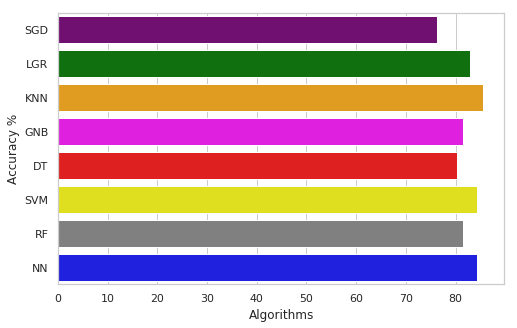

In [35]:
print(scores)

colors = ["purple", "green", "orange", "magenta", "red", "yellow", "grey", "blue"]
sns.set_style("whitegrid")
plt.figure(figsize = (8, 5))
plt.yticks(np.arange(0, 100, 10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x = scores, y = models_name, palette = colors)
plt.show()